# Innomatics Data Science Internship |  Entrance Test (Part 2 of 2) | Hackathon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Download the data from the above link. How many ".csv" files are available in the dataset?

In [2]:
movies = pd.read_csv('movies.csv')


In [3]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### What is the shape of "movies.csv"?


In [4]:
movies.shape

(9742, 3)

#### What is the shape of "ratings.csv"?
*

In [5]:
ratings = pd.read_csv('ratings.csv')


In [6]:
ratings.shape

(100836, 4)

In [7]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### How many unique "userId" are available in "ratings.csv"?


In [8]:
ratings['userId'].nunique()

610

#### Which movie has recieved maximum number of user ratings?
*

In [9]:
max_user_ratings = ratings.groupby('movieId')[['userId']].count()

In [10]:
max_user_ratings

,userId
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


max_user_ratings.sort_values('userId', ascending=False).head(20)

In [11]:
max_user_ratings.sort_values('userId', ascending=False).head(20)

,userId
movieId,
356,329
318,317
296,307
593,279
2571,278
260,251
480,238
110,237
589,224


In [12]:
res = movies[movies['movieId'] == 356]['title']

In [13]:
res

314    Forrest Gump (1994)
Name: title, dtype: object

#### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
tags = pd.read_csv('tags.csv')


In [15]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [16]:
res = movies[movies['title'] == 'Matrix, The (1999)']['movieId']

In [17]:
res

1939    2571
Name: movieId, dtype: int64

In [18]:
res1 = tags[tags['movieId'] == 2571]['tag']

In [19]:
res1

815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object

#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [20]:
new_df = movies.merge(ratings, on = 'movieId')


In [21]:
new_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [22]:
avg_ratings = new_df.groupby('title')[['rating']].mean()

In [23]:
avg_ratings

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [24]:
ind = avg_ratings.reset_index()

In [25]:
terminator = ind[ind['title'] == "Terminator 2: Judgment Day (1991)"]['rating']

In [26]:
terminator

8363    3.970982
Name: rating, dtype: float64

#### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [27]:
fight_club_ratings = new_df[new_df['title'] == 'Fight Club (1999)']


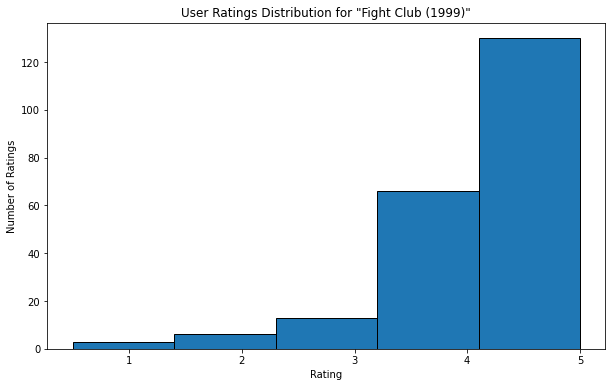

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [29]:
median_rating = fight_club_ratings['rating'].median()


In [30]:
median_rating

4.5

In [31]:
mean_rating = fight_club_ratings['rating'].mean()


In [32]:
mean_rating

4.272935779816514

**left-skewed, negative distribution will have the mean to the left of the median. A right-skewed distribution will have the mean to the right of the median.**

## 🟢 IMPORTANT NOTE 1 🟢

Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

#### 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 

In [33]:
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

In [34]:
grouped_ratings

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


#### 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [35]:
merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')


In [36]:
merged_data

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


#### 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [37]:
filtered_movies = merged_data[merged_data['count'] > 50]

In [38]:
filtered_movies

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


#### Which movie is the most popular based on  average user ratings?


In [39]:
sorted_movies = filtered_movies.sort_values(by='mean', ascending=False)

In [40]:
sorted_movies

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
...,...,...,...,...,...
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55,2.645455
379,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635


#### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [41]:
top_rated_movies = filtered_movies.sort_values(by='count', ascending=False)


In [42]:
top_rated_movies.head(5)

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [43]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]


In [44]:
sci_fi_movies

,movieId,title,genres,count,mean
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [45]:
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)


In [46]:
sorted_sci_fi_movies

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


## 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [47]:
links = pd.read_csv('links.csv')


In [48]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [49]:
!pip install beautifulsoup4
!pip install requests
!pip install openpyxl

In [50]:
import os
import requests
import openpyxl
from bs4 import BeautifulSoup

In [51]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    #soup = FILL_IN_THE_BLANK(response.text)
    soup = BeautifulSoup(response.text, 'html.parser')
    #imdb_rating = soup.find('FILL_IN_THE_BLANK', attrs={'FILL_IN_THE_BLANK' : 'FILL_IN_THE_BLANK'})
    imdb_rating = soup.find('span', attrs={'class': 'rating'})

    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
links['imdb_rating'] = links['imdbId'].apply(scrapper)

#### Mention the movieId of the movie which has the highest IMDB rating.

In [52]:
sorted_ratings = new_df.sort_values(by = 'rating', ascending = False)

In [53]:
sorted_ratings.head(5)

,movieId,title,genres,userId,rating,timestamp
56251,3676,Eraserhead (1977),Drama|Horror,567,5.0,1525282299
33888,1639,Chasing Amy (1997),Comedy|Drama|Romance,147,5.0,1203267694
20742,914,My Fair Lady (1964),Comedy|Drama|Musical|Romance,188,5.0,962560181
10168,356,Forrest Gump (1994),Comedy|Drama|Romance|War,283,5.0,901228020
10169,356,Forrest Gump (1994),Comedy|Drama|Romance|War,284,5.0,832695327


#### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [55]:
sci_fi = new_df[new_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

In [56]:
sci_fi

,movieId,title,genres,userId,rating,timestamp
1286,24,Powder (1995),Drama|Sci-Fi,6,4.0,845554397
1287,24,Powder (1995),Drama|Sci-Fi,32,3.0,856737205
1288,24,Powder (1995),Drama|Sci-Fi,71,2.0,864740028
1289,24,Powder (1995),Drama|Sci-Fi,111,2.5,1518640854
1290,24,Powder (1995),Drama|Sci-Fi,181,3.0,845470571
...,...,...,...,...,...,...
100806,188301,Ant-Man and the Wasp (2018),Action|Adventure|Comedy|Fantasy|Sci-Fi,596,4.0,1535709468
100816,189547,Iron Soldier (2010),Action|Sci-Fi,210,1.0,1528486011
100818,190183,The Darkest Minds (2018),Sci-Fi|Thriller,50,3.5,1533302021
100825,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,184,4.5,1537109489


In [57]:
sorted_sci_fi = sci_fi.sort_values(by = 'rating', ascending = False)

In [58]:
sorted_sci_fi.head(5)

,movieId,title,genres,userId,rating,timestamp
38121,2010,Metropolis (1927),Drama|Sci-Fi,182,5.0,1054779910
89143,68237,Moon (2009),Drama|Mystery|Sci-Fi|Thriller,122,5.0,1461561560
89156,68237,Moon (2009),Drama|Mystery|Sci-Fi|Thriller,339,5.0,1460182901
26334,1214,Alien (1979),Horror|Sci-Fi,480,5.0,1179160557
26331,1214,Alien (1979),Horror|Sci-Fi,469,5.0,965333710
